In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('insurance_data.csv')
df.sample(10)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
539,539,540,51.0,female,26.4,97,No,0,No,northwest,7419.48
598,598,599,40.0,male,33.4,94,No,1,No,northeast,8334.59
1009,1009,1010,22.0,male,27.1,86,Yes,0,Yes,southeast,17043.34
190,190,191,28.0,male,46.5,94,No,1,No,southeast,2927.06
374,374,375,38.0,female,26.1,81,Yes,0,No,southeast,5227.99
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1046,1046,1047,60.0,female,18.3,82,Yes,5,Yes,southwest,19023.26
1140,1140,1141,19.0,male,29.8,89,No,3,Yes,southwest,25309.49
110,110,111,27.0,female,27.1,88,Yes,0,No,southwest,2154.36
218,218,219,48.0,male,25.8,82,Yes,1,No,northeast,3309.79


# Drop Unnecessary Columns

In [3]:
df.drop(columns=['index','PatientID'],inplace=True)
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,NaN,male,34.1,100,No,0,No,northwest,1137.01


# Shape of Data

In [4]:
df.shape

(1340, 9)

# Null Values

In [5]:
df.isnull().sum()

age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1335 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1337 non-null   object 
 8   claim          1340 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 94.3+ KB


# Column Types

- **Numerical** - age,bmi,bloodpressure,claim
- **Categorical** -gender, diabetic,children,smoker, region

#  UniVariant EDA

In [7]:
df['age'].describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

In [24]:
df['age'].skew()

0.11382341584545372

<AxesSubplot: xlabel='age', ylabel='Count'>

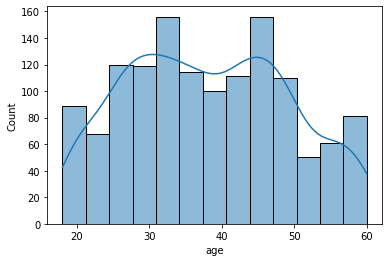

In [8]:
sns.histplot(df['age'],kde=True)

Data is almost Normally Distributed
Mostly Patience are of age 30 to 35 and 40 to 45

In [20]:
#Impute the null value with mean 
df['age'].fillna(df['age'].mean(),inplace=True)

In [21]:
df['age'].isnull().sum()

0

<AxesSubplot: >

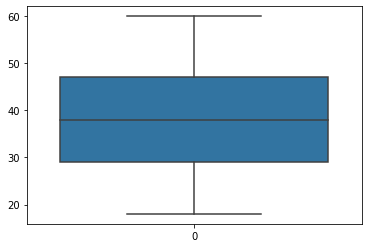

In [22]:
sns.boxplot(df['age'])

25% of patients are of age less than 28 and 75% of patients are of age less than 48

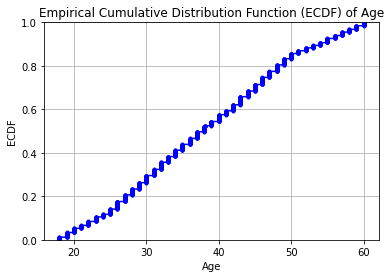

In [23]:
sns.ecdfplot(df['age'], marker='.', linestyle='-', color='b')

# Customize labels and title
plt.xlabel('Age')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function (ECDF) of Age')

# Show the plot
plt.grid(True)
plt.show()


In [25]:
df['bmi'].describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

<AxesSubplot: xlabel='bmi', ylabel='Count'>

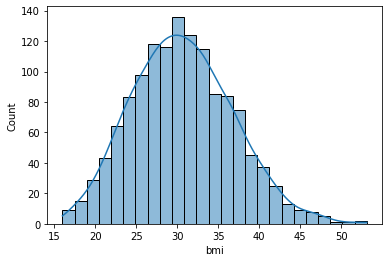

In [26]:
sns.histplot(df['bmi'],kde=True)

<AxesSubplot: >

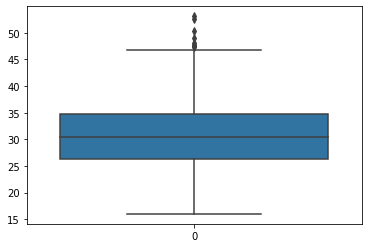

In [28]:
sns.boxplot(df['bmi'])

In [33]:
# iqr = df['bmi'].quantile(0.75) - df['bmi'].quantile(0.25)
upper_limit= df['bmi'].quantile(0.75) + iqr *1.5
df[df['bmi']>upper_limit].shape

(0, 9)

# BMI

- **Missing Values**     0 
- **Shape** Noraml Distriubution
- **Outliers** 9 max  Outliers

In [34]:
df['bmi']= np.where(df['bmi'] >upper_limit,upper_limit,df['bmi'])

# After Outlier Detection

<AxesSubplot: >

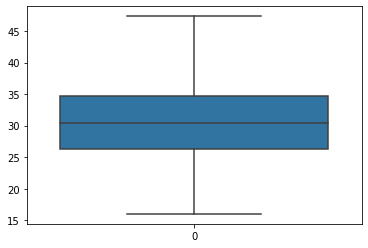

In [36]:
sns.boxplot(df['bmi'])

In [37]:
df['bloodpressure'].describe()

count    1340.000000
mean       94.157463
std        11.434712
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

<AxesSubplot: xlabel='bloodpressure', ylabel='Count'>

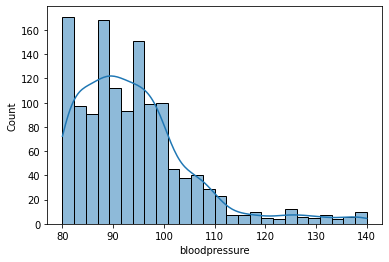

In [40]:
sns.histplot(df['bloodpressure'],kde=True)

<AxesSubplot: xlabel='bloodpressure', ylabel='Density'>

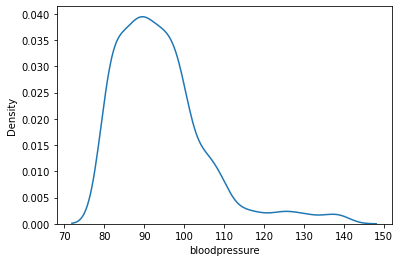

In [43]:
sns.kdeplot(df['bloodpressure'])

In [39]:
df['bloodpressure'].skew()

1.4835342102293079

<AxesSubplot: >

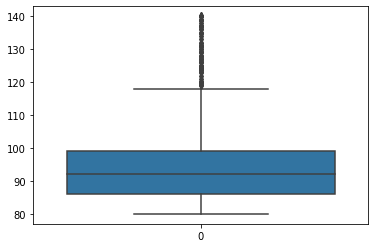

In [46]:
sns.boxplot(df['bloodpressure'])

In [47]:
iqr = df['bloodpressure'].quantile(0.75) - df['bloodpressure'].quantile(0.25)
upper_limit= df['bloodpressure'].quantile(0.75) + iqr *1.5
df[df['bloodpressure']>upper_limit].shape

(62, 9)

In [50]:
df[df['bloodpressure']>upper_limit].shape[0]/df.shape[0]*100

0.0

In [51]:
df['bloodpressure']= np.where(df['bloodpressure'] >upper_limit,upper_limit,df['bloodpressure'])